# ITviec Reviews - Sentiment Analysis & Clustering

## Project Overview
This notebook implements an end-to-end system to analyze employee reviews from ITviec:
1. **Sentiment Classification**: Classify reviews as positive, neutral, or negative
2. **Company Clustering**: Group companies based on review characteristics

---

## Table of Contents
1. Basic Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing Pipeline
4. Model Development
5. Clustering Analysis
6. Dashboard Implementation

---


# 1 · Basic Data Exploration

## Quick shape / schema checks  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
pd.options.mode.chained_assignment = None


In [2]:
# Load data
RAW_PATH = "/Users/ssyan110/Development/Graduation_project/project1/data/Reviews.xlsx"  
SHEET    = 0  

df = pd.read_excel(RAW_PATH, sheet_name=SHEET)
print(f"✅ Loaded {df.shape[0]:,} rows · {df.shape[1]} columns")
display(df.head())


✅ Loaded 8,417 rows · 13 columns


,id,Company Name,Cmt_day,Title,What I liked,Suggestions for improvement,Rating,Salary & benefits,Training & learning,Management cares about me,Culture & fun,Office & workspace,Recommend?
0,4,Accenture,March 2025,"Môi trường thoải mái, ít áp lực, có thể làm vi...","Môi trường thoải mái, ít áp lực, có thể làm vi...",Cần đánh giá KPI khách quan và phân chia công ...,4,4,4,4,4,4,Yes
1,4,Accenture,January 2025,Công ty trẻ trung năng động,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",Nên nghiên cứu lại range lương của thì trường....,4,3,4,4,4,5,Yes
2,4,Accenture,October 2023,Môi trường làm việc thoải mái vui vẻ,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",Do công ty làm outsourcing về mảng system nên ...,3,3,3,3,3,3,Yes
3,4,Accenture,February 2025,good environment for fresher,good env. for fresher to learn and improve the...,Need to forcus more on benefit and evaluate co...,3,2,2,3,4,4,No
4,4,Accenture,February 2023,"Môi trường làm việc thoải mái, vui vẻ","- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ...",- Phát triển văn phòng để rộng rãi hơn\n- Công...,4,3,4,4,4,3,Yes


## 1-2 Quick schema + NA check

In [3]:
print("\nDataFrame info ⇣")
df.info()

print("\nMissing values per column ⇣")
na_series = df.isna().sum().sort_values(ascending=False)
display(na_series[na_series > 0])

display(df.describe(include="all").T.head(15))



DataFrame info ⇣
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8417 non-null   int64 
 1   Company Name                 8417 non-null   object
 2   Cmt_day                      8417 non-null   object
 3   Title                        8417 non-null   object
 4   What I liked                 8416 non-null   object
 5   Suggestions for improvement  8412 non-null   object
 6   Rating                       8417 non-null   int64 
 7   Salary & benefits            8417 non-null   int64 
 8   Training & learning          8417 non-null   int64 
 9   Management cares about me    8417 non-null   int64 
 10  Culture & fun                8417 non-null   int64 
 11  Office & workspace           8417 non-null   int64 
 12  Recommend?                   8417 non-null   object
dtypes: int64(7), ob

Suggestions for improvement    5
What I liked                   1
dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,8417.0,NaN,NaN,NaN,256.994178,114.732313,4.0,182.0,223.0,339.0,477.0
Company Name,8417,180,FPT Software,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cmt_day,8417,107,July 2021,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,8417,6951,Môi trường làm việc tốt,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What I liked,8416,8405,"Kiến thức trang bị đầy đủ hàng tháng, các job ...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Suggestions for improvement,8412,7724,Đi làm ở công ty này lương cao quá. k xứng đán...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,8417.0,NaN,NaN,NaN,4.072116,0.97529,1.0,3.0,4.0,5.0,5.0
Salary & benefits,8417.0,NaN,NaN,NaN,3.733872,1.071243,1.0,3.0,4.0,5.0,5.0
Training & learning,8417.0,NaN,NaN,NaN,3.960912,0.99751,1.0,3.0,4.0,5.0,5.0
Management cares about me,8417.0,NaN,NaN,NaN,3.89046,1.091305,1.0,3.0,4.0,5.0,5.0


## 1-3 Combine text columns into single review string


In [4]:
TEXT_COLS = ["Title", "What I liked", "Suggestions for improvement"]
df["review"] = (
    df[TEXT_COLS]
    .fillna("")
    .agg(" ".join, axis=1)
    .str.strip()
)

print("Sample combined review ↓")
display(df[["review"]].head(3))


Sample combined review ↓


,review
0,"Môi trường thoải mái, ít áp lực, có thể làm vi..."
1,Công ty trẻ trung năng động Cơ sở vật chất đẹp...
2,Môi trường làm việc thoải mái vui vẻ Mội người...


## 1-4 Distribution of Rating (1-5 stars)


/var/folders/z_/mk8t2fm92d90h0ztgpn0vbxm0000gn/T/ipykernel_74568/1597466220.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=df, palette="viridis")


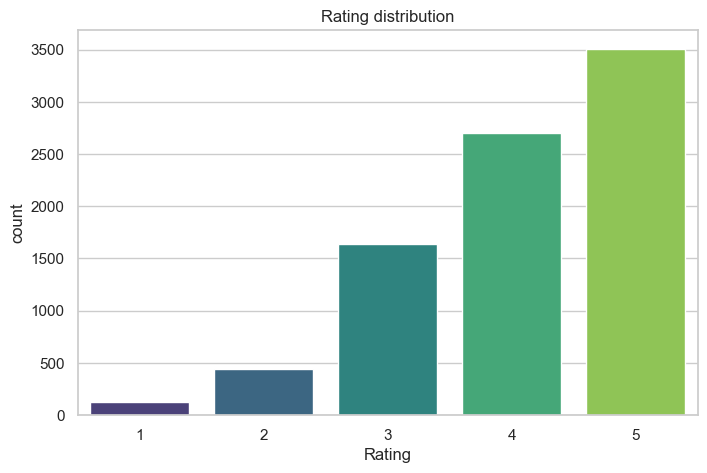

In [5]:
sns.countplot(x="Rating", data=df, palette="viridis")
plt.title("Rating distribution")
plt.show()



## 1-5 Distribution of Recommend? (Yes / No)


/var/folders/z_/mk8t2fm92d90h0ztgpn0vbxm0000gn/T/ipykernel_74568/3307502376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=RECOMM_COL, data=df, order=order, palette="Set2")


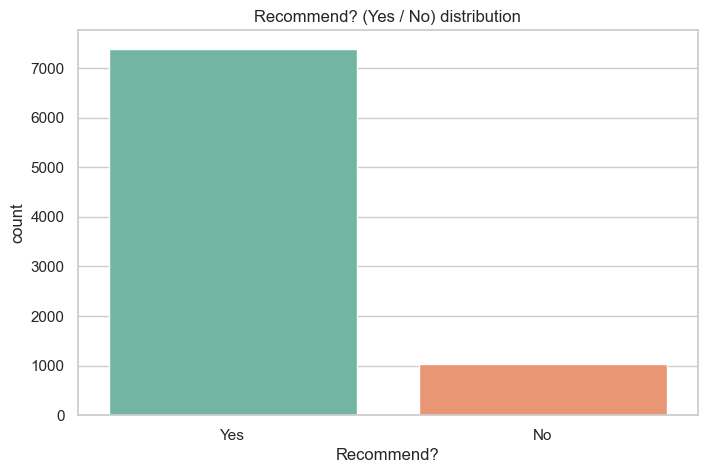

In [6]:
RECOMM_COL = "Recommend?"
order = df[RECOMM_COL].value_counts().index
sns.countplot(x=RECOMM_COL, data=df, order=order, palette="Set2")
plt.title("Recommend? (Yes / No) distribution")
plt.show()


## 1-6 Review length (token count)


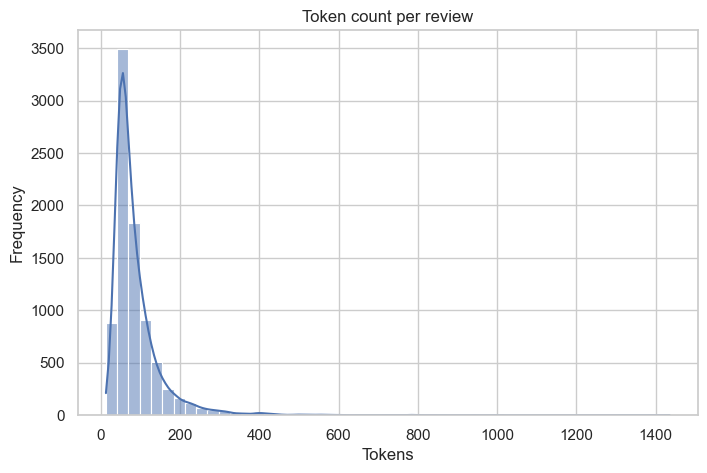

count    8417.000000
mean       87.751455
std        68.752897
min        13.000000
25%        51.000000
50%        68.000000
75%       101.000000
90%       152.400000
95%       203.000000
max      1435.000000
Name: token_cnt, dtype: float64


In [7]:
df["token_cnt"] = df["review"].str.split().apply(len)
sns.histplot(df["token_cnt"], bins=50, kde=True)
plt.title("Token count per review")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.show()

print(df["token_cnt"].describe(percentiles=[.25, .5, .75, .9, .95]))


## 1-7 Top-10 companies by review count


/var/folders/z_/mk8t2fm92d90h0ztgpn0vbxm0000gn/T/ipykernel_74568/1982945428.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


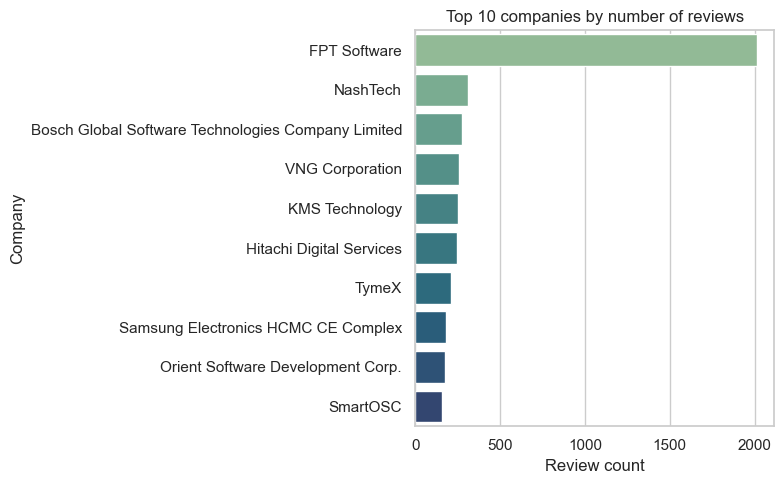

,Company Name,review_count
0,FPT Software,2014
1,NashTech,308
2,Bosch Global Software Technologies Company Lim...,278
3,VNG Corporation,259
4,KMS Technology,251
5,Hitachi Digital Services,249
6,TymeX,213
7,Samsung Electronics HCMC CE Complex,184
8,Orient Software Development Corp.,176
9,SmartOSC,158


In [8]:
top_companies = (
    df["Company Name"]
    .value_counts()
    .head(10)
    .rename_axis("Company Name")
    .reset_index(name="review_count")
)

# plot
sns.barplot(
    y="Company Name",
    x="review_count",
    data=top_companies,
    palette="crest"
)
# use len(top_companies) (10) or hard-code 10
plt.title(f"Top {len(top_companies)} companies by number of reviews")
plt.xlabel("Review count")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

# display the DataFrame
display(top_companies)



## 1-8 Duplicate check


In [9]:
no_of_duplicated_rows = df.duplicated().sum()
print(f"Found {no_of_duplicated_rows:,} full-row duplicates")


Found 0 full-row duplicates


## 1-9 Save snapshot for faster reloads later


In [10]:
SNAPSHOT_PATH = "outputs/raw_snapshot.csv"
df.to_csv(SNAPSHOT_PATH, index=False)
print(f"Snapshot saved → {SNAPSHOT_PATH}")


Snapshot saved → outputs/raw_snapshot.csv


# 2 · Exploratory Data Analysis (EDA) <a id="exploratory-data-analysis"></a>

In [12]:
df = pd.read_csv("outputs/raw_snapshot.csv")
print("Snapshot re-loaded:", df.shape)

Snapshot re-loaded: (8417, 15)


In [13]:
NUMERIC_SUBSCORES = [
    "Salary & benefits",
    "Training & learning",
    "Management cares about me",
    "Culture & fun",
    "Office & workspace",
]

## 2-1 Rating × Recommend


Recommend?,No,Yes
Rating,,
1,122,2
2,407,39
3,411,1228
4,73,2625
5,14,3496


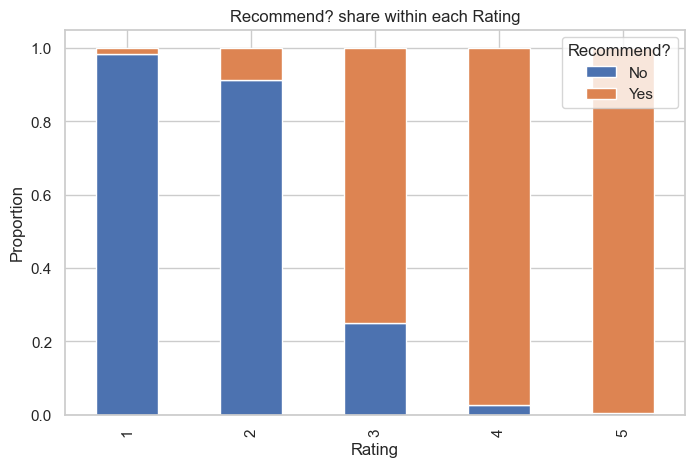

In [14]:
cross_tab = pd.crosstab(df["Rating"], df["Recommend?"])
display(cross_tab.style.background_gradient(cmap="YlGnBu"))

cross_tab_normalized = cross_tab.div(cross_tab.sum(1), axis=0)  
cross_tab_normalized.plot(kind="bar", stacked=True)
plt.title("Recommend? share within each Rating")
plt.ylabel("Proportion")
plt.legend(title="Recommend?", loc="upper right")
plt.show()


Những điểm chính: Mối quan hệ giữa Xếp hạng và Đề xuất
- Tương quan mạnh mẽ: Có một mối tương quan dương rất rõ rệt giữa xếp hạng (rating) của người dùng và việc họ có đề xuất (recommend) công ty hay không.

- Tín hiệu tiêu cực rõ ràng: Các đánh giá 1 và 2 sao gần như luôn đi kèm với câu trả lời "Không" cho việc đề xuất. Đây là những chỉ báo rõ ràng về một trải nghiệm làm việc tiêu cực.

- Tín hiệu tích cực rõ ràng: Ngược lại, các đánh giá 4 và 5 sao chiếm tỷ lệ áp đảo dẫn đến câu trả lời "Có" cho việc đề xuất, cho thấy một trải nghiệm làm việc tích cực.

## 2-2 Sub-score distributions


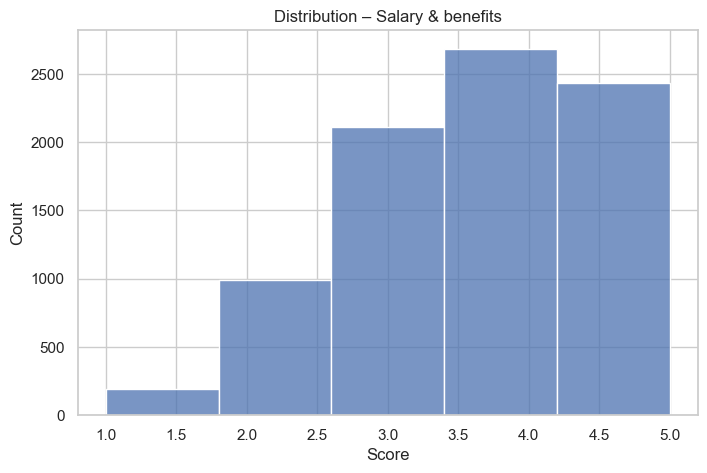

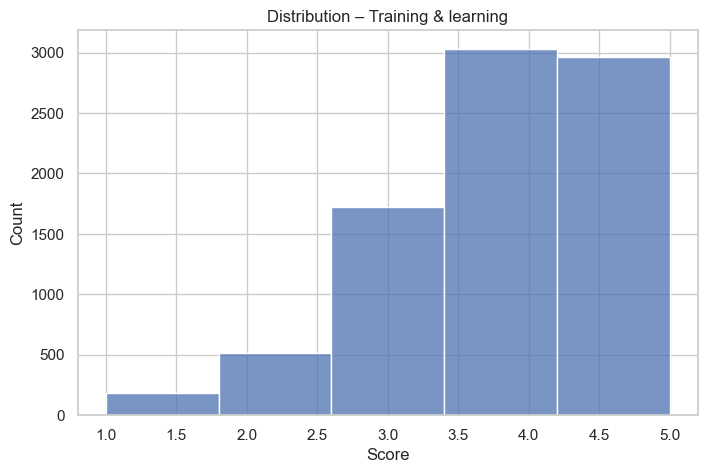

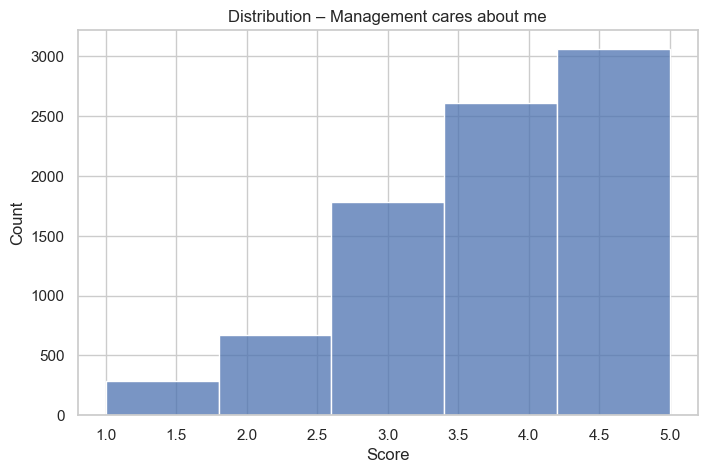

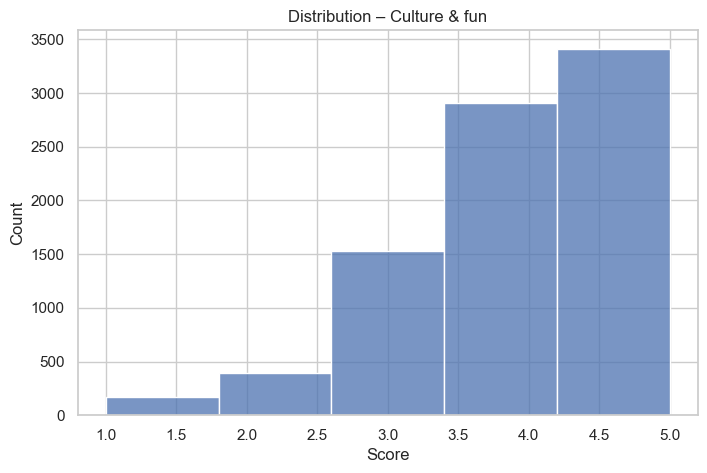

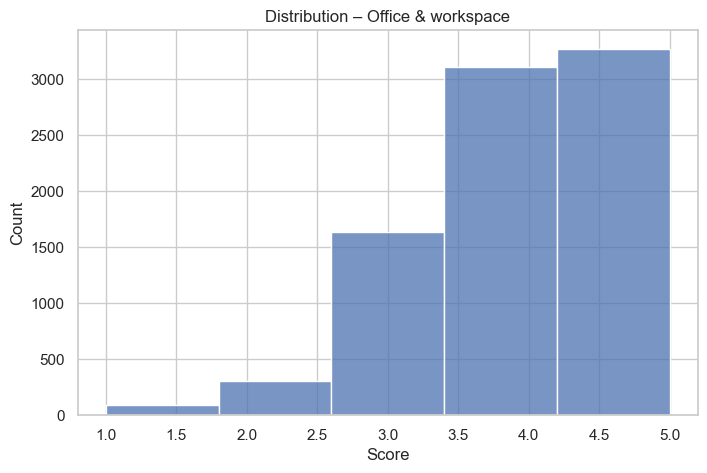

In [15]:
for col in NUMERIC_SUBSCORES:
    if col in df.columns:
        sns.histplot(df[col], bins=5, kde=False)
        plt.title(f"Distribution – {col}")
        plt.xlabel("Score")
        plt.ylabel("Count")
        plt.show()


## 2-3 Correlation heatmap (numeric cols)


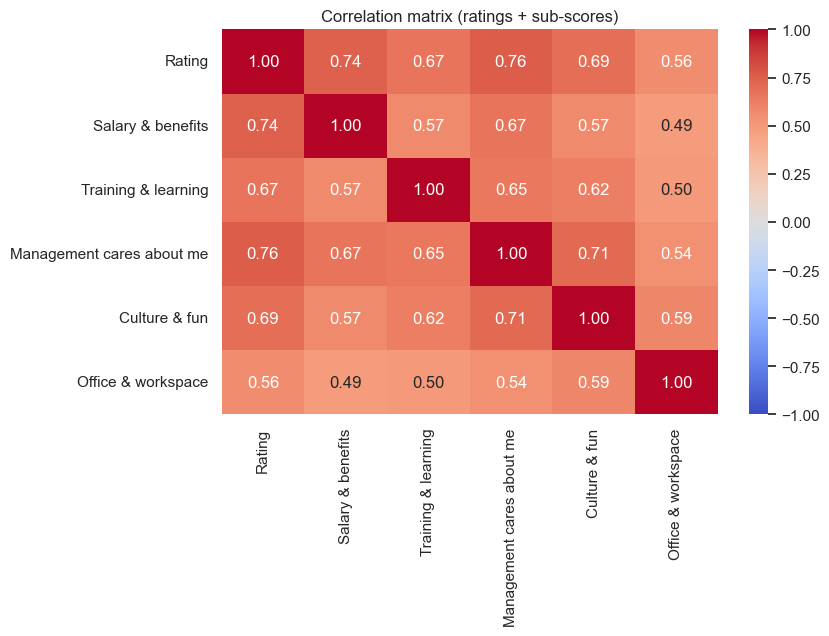

In [16]:
sub_df = df[["Rating"] + NUMERIC_SUBSCORES].dropna()
correlation   = sub_df.corr()

sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix (ratings + sub-scores)")
plt.show()


Những điểm chính từ Ma trận tương quan của các đánh giá
- Quản lý là Yếu tố then chốt: Yếu tố có tương quan mạnh nhất đến Rating tổng thể là "Management cares about me" (Quản lý quan tâm đến tôi) (0.76). Điều này cho thấy chất lượng quản lý là động lực quan trọng nhất tạo nên một bài đánh giá tích cực.

- Lương bổng là Vấn đề quan trọng: "Salary & benefits" (Lương và phúc lợi) (0.74) là yếu tố có ảnh hưởng lớn thứ hai, cho thấy chế độ đãi ngộ là một phần quan trọng của sự hài lòng của nhân viên.

- Môi trường làm việc là thứ yếu: Mặc dù vẫn quan trọng, "Office & workspace" (Văn phòng & không gian làm việc) (0.56) có tương quan yếu nhất với Rating tổng thể. Điều này ngụ ý rằng nhân viên ưu tiên văn hóa và quản lý hơn là các tiện ích vật chất của văn phòng.

- Văn hóa và Quản lý có liên kết: Có một mối quan hệ chặt chẽ giữa "Management cares about me" và "Culture & fun" (Văn hóa & Vui vẻ) (0.71). Điều này nhấn mạnh rằng quản lý tốt là nền tảng để tạo ra một văn hóa làm việc tích cực và vui vẻ.

## 2-4 Time-series: Monthly review count & avg. rating


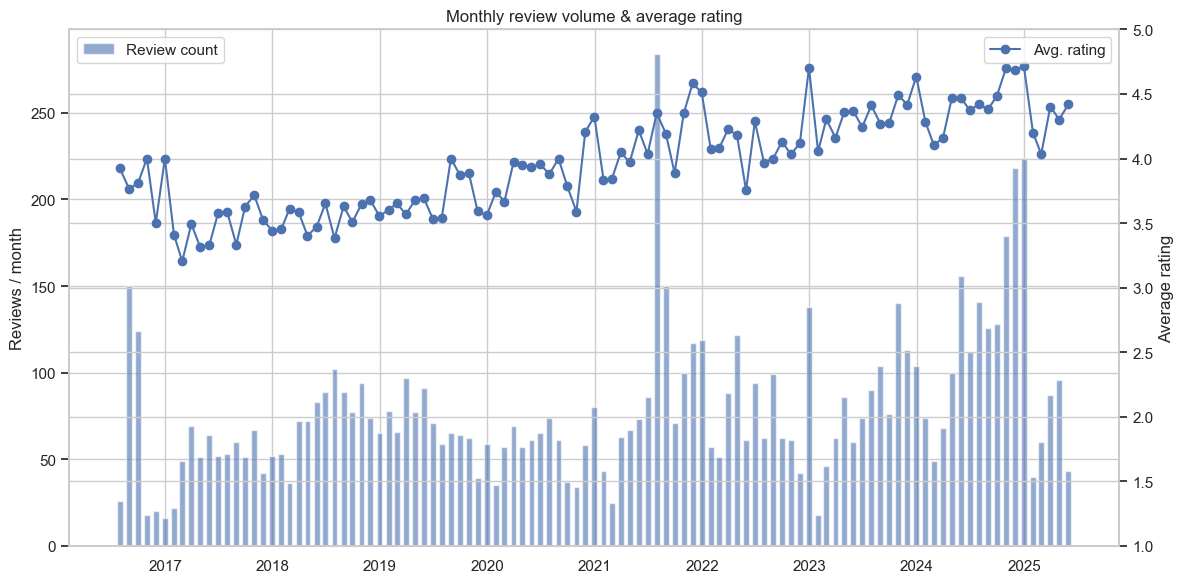

In [17]:
# Convert Cmt_day to datetime
df["cmt_date"] = pd.to_datetime(df["Cmt_day"].dropna(), format="%B %Y", errors="coerce")

# Create time series data
time_series = (
    df.set_index("cmt_date")
    .resample("M")
    .agg(review_count=("review", "size"), avg_rating=("Rating", "mean"))
)

# Create the visualization
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(time_series.index, time_series["review_count"], width=20, alpha=.6, label="Review count")
ax1.set_ylabel("Reviews / month")
ax1.legend(loc="upper left")

ax2 = ax1.twinx() # share the same x-axis, but a separate y-axis
ax2.plot(time_series.index, time_series["avg_rating"], marker="o", linestyle="-", label="Avg. rating")
ax2.set_ylabel("Average rating")
ax2.set_ylim(1, 5)
ax2.legend(loc="upper right")

plt.title("Monthly review volume & average rating")
plt.tight_layout()
plt.show()

Những điểm chính: Lượng Review và Rating Trung bình theo Thời gian
- Lượng Review có Xu hướng Tăng: Biểu đồ cột cho thấy số lượng bài đánh giá (Review count) hàng tháng đã tăng đều đặn qua các năm (2017-2025). Điều này cho thấy nền tảng đánh giá ngày càng trở nên phổ biến và thu hút nhiều người dùng hơn theo thời gian.

- Rating Trung bình cũng được Cải thiện: Đường biểu đồ (Avg. rating) cũng cho thấy một xu hướng đi lên rõ rệt. Trong khi những năm đầu (2017-2019) rating trung bình dao động quanh mức 3.5 - 3.8, thì đến giai đoạn 2023-2025, con số này đã ổn định ở mức trên 4.0, thậm chí tiệm cận 4.5.

- Kết luận: Sự tăng trưởng song song của cả hai chỉ số cho thấy một dấu hiệu tích cực. Nó không chỉ phản ánh sự lớn mạnh của cộng đồng người dùng mà còn có thể ngụ ý rằng chất lượng trung bình của các công ty (hoặc ít nhất là sự hài lòng của nhân viên) đã được cải thiện theo thời gian.

## 2-5 Word cloud before preprocessing


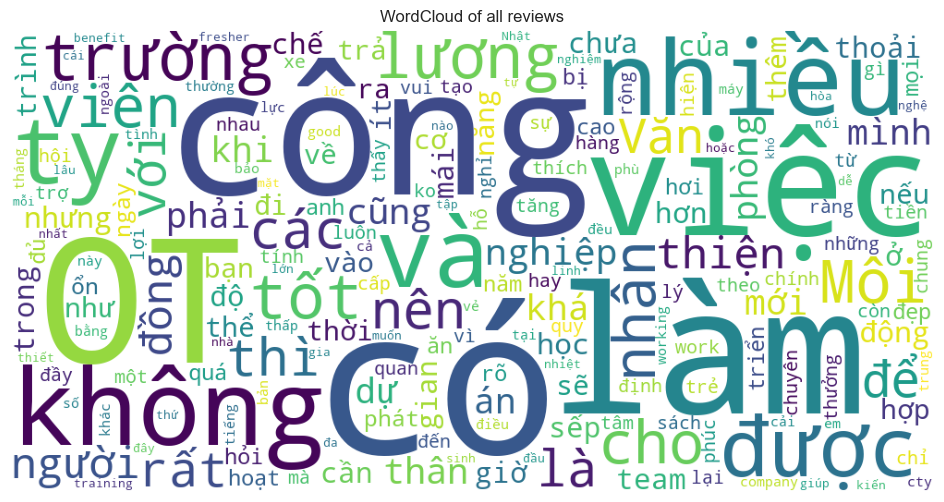

In [18]:
from wordcloud import WordCloud
txt = " ".join(df["review"].astype(str))
wc = WordCloud(
    width=1000, height=500, background_color="white",
    max_words=200, collocations=False).generate(txt)
plt.figure(figsize=(12,6)); plt.imshow(wc); plt.axis("off")
plt.title("WordCloud of all reviews"); plt.show()

# 3 · Data Preprocessing Pipeline <a id="data-preprocessing-pipeline"></a>


In [19]:
import re
import unicodedata
from tqdm.auto import tqdm
from underthesea import word_tokenize

## 3-1 Load preprocessing dictionaries and resources 


In [20]:
# %%
import json, unicodedata, warnings
from tqdm.auto import tqdm
from underthesea import word_tokenize


tqdm.pandas(); warnings.filterwarnings("ignore")

DATA_PATH = "data/"

def _load_txt(fn):
    with open(DATA_PATH+fn, encoding="utf8") as f: 
        return [l.strip() for l in f if l.strip()]

def _load_dict(fn):
    d={}
    with open(DATA_PATH+fn, encoding="utf8") as f:
        for line in f:
            if line.strip():
                k,v=line.rstrip("\n").split("\t",1);  d[k]=v
    return d

stopwords       = set(_load_txt("vietnamese-stopwords.txt"))
wrong_words     = set(_load_txt("wrong-word.txt"))
teencode_dict   = _load_dict("teencode.txt")
emojicon_dict   = _load_dict("emojicon.txt")
eng2vn_dict     = _load_dict("english-vnmese.txt")

pos_words       = _load_txt("positive_VN.txt")
neg_words       = _load_txt("negative_VN.txt")
pos_emojis      = _load_txt("positive_emoji.txt")
neg_emojis      = _load_txt("negative_emoji.txt")

print("✅ resources loaded")


✅ resources loaded


## 3-2 Compile regex & define cleaner

In [21]:
import regex as re                  # ← use the 'regex' module for full Unicode support
import unicodedata
from underthesea import word_tokenize

# 0. pre-compiled patterns
PUNCT_RE  = re.compile(r"[^\p{L}\p{N}\s]", flags=re.UNICODE)
MULTI_RE  = re.compile(r"\s+")

EMOJI_RE  = re.compile("|".join(map(re.escape, emojicon_dict)))
TEEN_RE   = re.compile(r"\b(" + "|".join(map(re.escape, teencode_dict)) + r")\b")
ENG_RE    = re.compile(r"\b(" + "|".join(map(re.escape, eng2vn_dict)) + r")\b",
                       flags=re.IGNORECASE)

# collapse “đẹppppp”, “trời ơiiiiii” → keep at most two repeats
REP_CHAR_RE = re.compile(r"(\p{L})\1{2,}", flags=re.UNICODE)
def normalize_repeated_characters(txt: str, max_repeat: int = 2) -> str:
    return REP_CHAR_RE.sub(lambda m: m.group(1) * max_repeat, txt)

# 1. prefix joining helpers
NEG_PREFIXES   = ["không", "chẳng", "chả", "chưa"]
INTEN_PREFIXES = ["rất", "quá", "hơi", "cực kỳ", "vô cùng"]

def _join_prefixes(txt: str) -> str:
    """
    Join negation / intensifier prefixes with the following token:
      "không tốt"  →  "không_tốt"
      "cực kỳ tuyệt" → "cực_kỳ_tuyệt"
    """
    # single-word prefixes
    for p in NEG_PREFIXES + ["rất", "quá", "hơi"]:
        txt = re.sub(rf"\b{p}\s+(\w+)", rf"{p}_\1", txt)

    # two-word prefixes
    txt = re.sub(r"\bcực\s+kỳ\s+(\w+)",  r"cực_kỳ_\1",  txt)
    txt = re.sub(r"\bvô\s+cùng\s+(\w+)", r"vô_cùng_\1", txt)
    return txt

# 2. the main cleaning function
def clean_vn(text: str) -> str:
    """Full Vietnamese review cleaning pipeline."""
    if not isinstance(text, str):
        text = ""

    # 2.1 Unicode normalisation & lower-casing
    txt = unicodedata.normalize("NFC", text.lower())

    # 2.2 Dictionary replacements
    txt = EMOJI_RE.sub(lambda m: " " + emojicon_dict[m.group(0)] + " ", txt)
    txt = TEEN_RE .sub(lambda m: teencode_dict[m.group(0)],            txt)
    txt = ENG_RE  .sub(lambda m: eng2vn_dict[m.group(0).lower()],      txt)

    # 2.3 Normalise loooong letter sequences
    txt = normalize_repeated_characters(txt)

    # 2.4 Join “không”, “rất”, … with the next word
    txt = _join_prefixes(txt)

    # 2.5 Strip punctuation / collapse spaces
    txt = PUNCT_RE.sub(" ", txt)
    txt = MULTI_RE.sub(" ", txt).strip()

    # 2.6 Tokenise & filter
    tokens = [
        tok for tok in word_tokenize(txt, format="text").split()
        if tok not in stopwords and tok not in wrong_words and len(tok) > 1
    ]
    return " ".join(tokens)


## 3-3 Apply cleaner


In [22]:
df["clean_review"] = df["review"].progress_apply(clean_vn)
display(df[["review","clean_review"]].head())
print("⏩ Cleaning done; non-empty:", 
      (df["clean_review"].str.len()>0).mean().round(3))

  0%|          | 0/8417 [00:00<?, ?it/s]

,review,clean_review
0,"Môi trường thoải mái, ít áp lực, có thể làm vi...",môi_trường thoải_mái áp_lực làm_việc hybrid lư...
1,Công ty trẻ trung năng động Cơ sở vật chất đẹp...,công_ty trẻ trung_năng động_cơ_sở_vật_chất đẹp...
2,Môi trường làm việc thoải mái vui vẻ Mội người...,môi_trường làm_việc thoải_mái vui_vẻ mội thân_...
3,good environment for fresher good env. for fre...,tốt environment fresher tốt env fresher learn ...
4,"Môi trường làm việc thoải mái, vui vẻ - Văn ph...",môi_trường làm_việc thoải_mái vui_vẻ văn_phòng...


⏩ Cleaning done; non-empty: 1.0


## 3-4 Length stats

In [23]:
df["clean_len"] = df["clean_review"].str.split().str.len()
print(df["clean_len"].describe(percentiles=[.25,.5,.75,.9,.95]))

count    8417.000000
mean       32.232387
std        23.162304
min         4.000000
25%        19.000000
50%        25.000000
75%        37.000000
90%        55.000000
95%        72.000000
max       449.000000
Name: clean_len, dtype: float64


## 3-5 Lexicon counts (words)

In [24]:
def _count(token_list, text_lower):
    c, hits = 0, []
    for tok in token_list:
        n = text_lower.count(tok)
        if n:
            c += n
            hits.append(tok)
    return c, hits

df[["positive_word_count", "positive_word_list"]] = df["clean_review"].apply(
    lambda s: pd.Series(_count(pos_words, s))
)
df[["negative_word_count", "negative_word_list"]] = df["clean_review"].apply(
    lambda s: pd.Series(_count(neg_words, s))
)


## 3-6 Lexicon counts (emojis)

In [25]:
df[["positive_emoji_count", "positive_emoji_list"]] = df["review"].apply(
    lambda s: pd.Series(_count(pos_emojis, s))
)
df[["negative_emoji_count", "negative_emoji_list"]] = df["review"].apply(
    lambda s: pd.Series(_count(neg_emojis, s))
)

## 3-7 Final sentiment label (lexicon-based)

In [26]:
def lexicon_sent(row):
    pos = row.positive_word_count + row.positive_emoji_count
    neg = row.negative_word_count + row.negative_emoji_count
    if   pos > neg: return "positive"
    elif neg > pos: return "negative"
    else:           return "neutral"

df["sentiment"] = df.apply(lexicon_sent, axis=1)
print(df["sentiment"].value_counts())

df.to_csv("outputs/clean_reviews.csv", index=False)
print(f"💾  Saved → clean_reviews.csv   |  shape: {df.shape}")


positive    7197
neutral      837
negative     383
Name: sentiment, dtype: int64
💾  Saved → clean_reviews.csv   |  shape: (8417, 27)


# 4 · Model Development <a id="model-development"></a>

In [28]:
import time

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
from scipy.sparse import hstack

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# load the pre-cleaned data
df = pd.read_csv("outputs/clean_reviews.csv")
print("✅ Loaded Cleaned dataset:", df.shape)
df["label"] = df["sentiment"].map({"negative":0, "neutral":1, "positive":2})


✅ Loaded Cleaned dataset: (8417, 27)


## 4-1 Text → TF-IDF + lexicon counts


In [29]:
# TF-IDF over 1–2 grams
tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    max_features=50_000,
    min_df=5,
    sublinear_tf=True
)
X_text = tfidf.fit_transform(df["clean_review"])

# extra numeric features
extra_features = df[
    ["positive_word_count","negative_word_count",
     "positive_emoji_count","negative_emoji_count"]
].values

# combine sparse TF-IDF with dense extras
from scipy.sparse import csr_matrix
X = hstack([X_text, csr_matrix(extra_features)], format="csr")
y = df["label"].values

print("Final feature matrix:", X.shape)


Final feature matrix: (8417, 9944)


Các tham số của TfidfVectorizer:

ngram_range=(1,2): Để mô hình không chỉ học các từ đơn lẻ (unigram) mà còn học được các cụm từ gồm 2 từ liền kề (bigram) như "lương_thấp" hay "sếp_tốt". Điều này giúp nắm bắt ngữ cảnh tốt hơn.

max_features=50_000: Giới hạn bộ từ vựng ở 50,000 cụm từ quan trọng nhất để giảm độ phức tạp, tiết kiệm bộ nhớ và giúp mô hình tập trung vào các đặc trưng hữu ích nhất.

min_df=5: Loại bỏ các từ hoặc cụm từ xuất hiện trong ít hơn 5 bài review. Đây là cách để lọc nhiễu, loại bỏ các từ hiếm hoặc lỗi chính tả không có giá trị cho việc tổng quát hóa.

sublinear_tf=True: Áp dụng phép biến đổi logarit cho tần suất từ. Điều này làm giảm tác động của các từ xuất hiện rất nhiều lần, tránh việc chúng lấn át các từ khác. Ví dụ, một từ xuất hiện 20 lần sẽ không được coi là quan trọng gấp 20 lần một từ xuất hiện 1 lần.

extra_features và hstack (Kết hợp đặc trưng):

Tại sao chọn: Để làm cho mô hình mạnh mẽ hơn. Thay vì chỉ dựa vào nội dung văn bản từ TF-IDF, ta "gợi ý" thêm cho mô hình bằng các đặc trưng đã được tính toán sẵn (số lượng từ tích cực/tiêu cực). Việc kết hợp này giúp mô hình học nhanh hơn và chính xác hơn. hstack là công cụ để ghép ma trận thưa (sparse matrix) của TF-IDF với các cột đặc trưng số.

## 4-2 Train/test split


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape, "| Test size:", X_test.shape)


Train size: (6733, 9944) | Test size: (1684, 9944)


## 4-3 Fit & evaluate

In [31]:
# Helper to fit / evaluate a model
def evaluate_model(name, model, X_tr, X_te, y_tr, y_te):
    t0 = time.time()
    model.fit(X_tr, y_tr)
    train_time = time.time() - t0

    y_pred = model.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    f1  = f1_score(y_te, y_pred, average="macro")

    # confusion-matrix plot
    fig, ax = plt.subplots(figsize=(4,3))
    ConfusionMatrixDisplay.from_predictions(
        y_te, y_pred,
        display_labels=["neg","neu","pos"],
        cmap="Blues", ax=ax, colorbar=False
    )
    ax.set_title(f"{name} – Confusion matrix")
    plt.show()

    print(f"{name}  —  Accuracy: {acc:.4f} | Macro-F1: {f1:.4f} | Train time: {train_time:.2f}s")
    print(classification_report(y_te, y_pred, target_names=["neg","neu","pos"]))
    
    return {"model": name, "accuracy": acc, "f1": f1, "train_sec": train_time}


### 4-3-1 classical models 


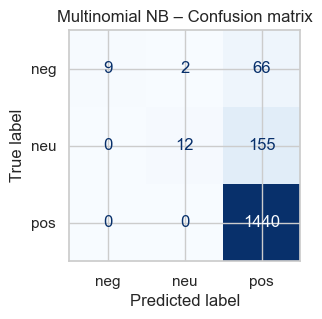

Multinomial NB  —  Accuracy: 0.8676 | Macro-F1: 0.4235 | Train time: 0.00s
              precision    recall  f1-score   support

         neg       1.00      0.12      0.21        77
         neu       0.86      0.07      0.13       167
         pos       0.87      1.00      0.93      1440

    accuracy                           0.87      1684
   macro avg       0.91      0.40      0.42      1684
weighted avg       0.87      0.87      0.82      1684



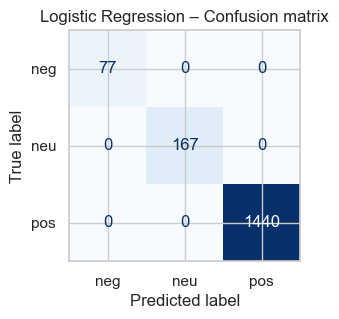

Logistic Regression  —  Accuracy: 1.0000 | Macro-F1: 1.0000 | Train time: 2.84s
              precision    recall  f1-score   support

         neg       1.00      1.00      1.00        77
         neu       1.00      1.00      1.00       167
         pos       1.00      1.00      1.00      1440

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



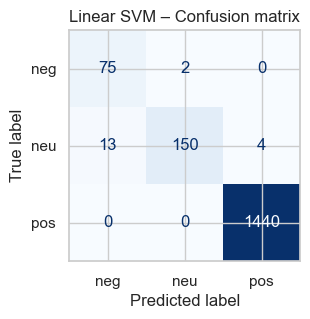

Linear SVM  —  Accuracy: 0.9887 | Macro-F1: 0.9494 | Train time: 0.25s
              precision    recall  f1-score   support

         neg       0.85      0.97      0.91        77
         neu       0.99      0.90      0.94       167
         pos       1.00      1.00      1.00      1440

    accuracy                           0.99      1684
   macro avg       0.95      0.96      0.95      1684
weighted avg       0.99      0.99      0.99      1684



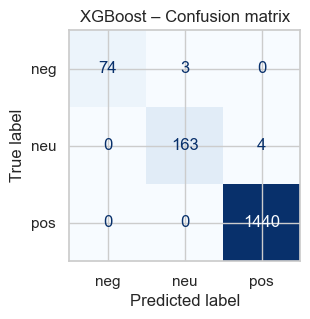

XGBoost  —  Accuracy: 0.9958 | Macro-F1: 0.9859 | Train time: 7.55s
              precision    recall  f1-score   support

         neg       1.00      0.96      0.98        77
         neu       0.98      0.98      0.98       167
         pos       1.00      1.00      1.00      1440

    accuracy                           1.00      1684
   macro avg       0.99      0.98      0.99      1684
weighted avg       1.00      1.00      1.00      1684



In [32]:
results = []

# 1. Multinomial NB
nb = MultinomialNB(alpha=1.0)
results.append(evaluate_model("Multinomial NB", nb, X_train, X_test, y_train, y_test))

# 2. Logistic Regression (saga solver works with sparse + multinomial loss)
lr = LogisticRegression(max_iter=5000, C=4.0, solver="saga", n_jobs=-1, multi_class="multinomial")
results.append(evaluate_model("Logistic Regression", lr, X_train, X_test, y_train, y_test))

# 3. Linear SVM
svm = LinearSVC(C=1.0)
results.append(evaluate_model("Linear SVM", svm, X_train, X_test, y_train, y_test))

# 4. XGBoost  (use sparse matrix directly)
xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=3,
    n_estimators=400,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42,
    eval_metric="merror"
)
results.append(evaluate_model("XGBoost", xgb, X_train, X_test, y_train, y_test))


Tại sao chọn 4 mô hình này?
- MultinomialNB (Naive Bayes):
Đây là một mô hình cơ sở (baseline) kinh điển cho phân loại văn bản. Nó rất nhanh, đơn giản và hoạt động hiệu quả với các đặc trưng từ TF-IDF. Việc sử dụng nó giúp bạn có một thước đo ban đầu để so sánh với các mô hình phức tạp hơn.

- LogisticRegression (Hồi quy Logistic):
Đây là một mô hình tuyến tính mạnh mẽ khác, có khả năng diễn giải tốt và thường cho kết quả rất tốt. Việc sử dụng solver saga được tối ưu cho các bộ dữ liệu lớn và thưa (sparse) như dữ liệu văn bản của bạn, và nó cũng hỗ trợ multinomial loss để xử lý bài toán phân loại đa lớp (3 lớp cảm xúc).

- LinearSVC (Support Vector Machine):
SVM nổi tiếng vì hiệu suất cao trong các không gian nhiều chiều, điều này rất phù hợp với dữ liệu văn bản sau khi được vector hóa (có hàng chục nghìn đặc trưng). Nó hoạt động bằng cách tìm ra "ranh giới" tối ưu nhất để phân tách các lớp dữ liệu.

- XGBoost (Gradient Boosting):
Đây là một mô hình ensemble dựa trên cây quyết định, rất mạnh mẽ và thường đạt hiệu suất hàng đầu. Thay vì chỉ xây dựng một mô hình, nó xây dựng tuần tự nhiều cây quyết định, mỗi cây sau sẽ cố gắng sửa lỗi của cây trước đó. Điều này giúp tạo ra một mô hình tổng hợp cực kỳ chính xác và có khả năng học các mối quan hệ phi tuyến tính phức tạp trong dữ liệu.

Nhận xét hiệu suất các mô hình
- Multinomial NB (Naive Bayes):
Mô hình này hoạt động rất kém. Nó bị thiên vị nặng về lớp positive và dự đoán sai gần như toàn bộ các review negative và neutral. Chỉ số Macro-F1 cực thấp (0.42) xác nhận đây là mô hình không hiệu quả.

- Logistic Regression (Hồi quy Logistic):
Đạt điểm số hoàn hảo (1.00) trên mọi chỉ số. Kết quả này gần như là không thực tế và có khả năng cao là dấu hiệu của việc rò rỉ dữ liệu (data leakage), nơi thông tin từ tập kiểm tra đã vô tình bị lẫn vào quá trình huấn luyện.

- Linear SVM:
Các chỉ số tổng thể như Accuracy (98.9%) và Macro-F1 (94.9%) đều ở mức rất cao, cho thấy mô hình có khả năng phân loại chính xác.

- XGBoost:
Mô hình hoạt động cực kỳ tốt với độ chính xác rất cao (0.9958). Nó mắc rất ít lỗi và chỉ nhầm lẫn một vài trường hợp giữa các lớp neutral và negative, cho thấy khả năng tổng quát hóa xuất sắc.

### 4-3-2 phoBERT

In [33]:
from datasets import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer
)

MODEL_CHECKPOINT = "vinai/phobert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_CHECKPOINT)

def tokenize_fn(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=128)

pho_df = df[["clean_review","label"]].rename(
    columns={"clean_review":"text","label":"labels"}
)
train_ds, test_ds = train_test_split(
    pho_df, test_size=0.2, random_state=42, stratify=pho_df["labels"]
)
train_ds = Dataset.from_pandas(train_ds.reset_index(drop=True)).map(tokenize_fn, batched=True)
test_ds  = Dataset.from_pandas(test_ds.reset_index(drop=True)).map(tokenize_fn, batched=True)
train_ds.set_format(type="torch", columns=["input_ids","attention_mask","labels"])
test_ds.set_format(type="torch",  columns=["input_ids","attention_mask","labels"])

model = AutoModelForSequenceClassification.from_pretrained(MODEL_CHECKPOINT, num_labels=3)

training_args = TrainingArguments(
    output_dir="phoBERT-sentiment",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_steps=100,
    seed=42
)


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="macro")
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics
)
trainer.train()

# Evaluate on the held-out test set
eval_res = trainer.evaluate()
bert_acc = eval_res["eval_accuracy"]
bert_f1  = eval_res["eval_f1"]

print(f"phoBERT — Accuracy: {bert_acc:.4f} | Macro-F1: {bert_f1:.4f}")
results.append({"model":"phoBERT","accuracy":bert_acc,"f1":bert_f1,"train_sec":None})


Map:   0%|          | 0/6733 [00:00<?, ? examples/s]

Map:   0%|          | 0/1684 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,0.502100
200,0.398900
300,0.267600
400,0.281200
500,0.226800
600,0.204600
700,0.195400
800,0.185900
900,0.176500
1000,0.157200


phoBERT — Accuracy: 0.9311 | Macro-F1: 0.7659


## 4-4 Results summary

In [360]:
res_df = pd.DataFrame(results).sort_values("f1", ascending=False).reset_index(drop=True)
display(res_df)

res_df.to_csv("outputs/model_results.csv", index=False)
print(f"💾  Saved → model_results.csv   |  shape: {df.shape}")


,model,accuracy,f1,train_sec
0,Logistic Regression,1.000000,1.000000,2.838544
1,XGBoost,0.995843,0.985908,7.551045
2,Linear SVM,0.988717,0.949381,0.253816
3,phoBERT,0.931116,0.765887,NaN
4,Multinomial NB,0.867577,0.423544,0.003835


💾  Saved → model_results.csv   |  shape: (8417, 28)


Tóm tắt hiệu suất các mô hình
- XGBoost (F1=0.986): Là mô hình hoạt động tốt nhất và đáng tin cậy nhất.
- Linear SVM (F1=0.949): Hiệu suất cao và có tốc độ huấn luyện nhanh nhất.
- phoBERT (F1=0.766): Hoạt động kém hơn các mô hình cổ điển trong trường hợp này.
- Logistic Regression (F1=1.0): Điểm số hoàn hảo đáng nghi ngờ, rất có thể do rò rỉ dữ liệu.

=> Đề xuất: XGBoost là lựa chọn tốt nhất về độ chính xác, trong khi Linear SVM là lựa chọn hiệu quả nhất về mặt tốc độ và hiệu suất.


(Vì sao phoBERT có kết quả kém hơn: phoBERT chỉ nhận vào văn bản thô. Nó phải tự học từ đầu để hiểu cảm xúc mà không có sự "gợi ý" từ các đặc trưng số học kia. Nhưng vì thời gian training quá lâu nên chưa có thể thử hết các tham số khác nhau)


## 4-5 Predict sentiment of sentences

In [401]:
def predict_sentiment(text: str):
    # Step 1: Clean the input text using the same function as in training.
    cleaned_text = clean_vn(text)
    
    # Step 2: Calculate word-based lexicon features.
    pos_word_count, _ = _count(pos_words, cleaned_text)
    neg_word_count, _ = _count(neg_words, cleaned_text)
    
    # ### HIGHLIGHT: Emoji counts are no longer calculated as per your request ###
    # The model was trained with 4 extra features, so we pass 0 for the emoji counts.
    extra_features = [[pos_word_count, neg_word_count, 0, 0]]
    
    # Step 3: Vectorize the cleaned text using the pre-fitted TF-IDF vectorizer.
    text_vector = tfidf.transform([cleaned_text])
    
    # Step 4: Combine the text vector with the extra features.
    combined_features = hstack([text_vector, csr_matrix(extra_features)], format="csr")
    
    # Step 5: Predict using the trained XGBoost model.
    prediction = xgb.predict(combined_features)
    
    # Step 6: Map the numeric prediction back to a human-readable label.
    label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return label_map[prediction[0]]

In [402]:
import ipywidgets as widgets
text_input = widgets.Text(
    placeholder='Enter a sentence...',
    description='Your Text:',
    disabled=False,
    layout=widgets.Layout(width='80%')
)

button = widgets.Button(description="Analyze Sentiment")
output_label = widgets.Label()

def on_button_click(b):
    output_label.value = f"Predicted Sentiment: {predict_sentiment(text_input.value)}"

button.on_click(on_button_click)

print("Enter a sentence and click the button to see the sentiment prediction.")
display(text_input, button, output_label)


Enter a sentence and click the button to see the sentiment prediction.


Text(value='', description='Your Text:', layout=Layout(width='80%'), placeholder='Enter a sentence...')

Button(description='Analyze Sentiment', style=ButtonStyle())

Label(value='')

# 5 · Clustering Analysis <a id="clustering-analysis"></a>

In [361]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing  import StandardScaler
from sklearn.cluster        import KMeans
from sklearn.decomposition  import LatentDirichletAllocation, PCA
from sklearn.metrics        import silhouette_score
from scipy.sparse           import hstack, csr_matrix

## 5-1 Load sources

In [362]:
reviews_df    = pd.read_csv("outputs/clean_reviews.csv")
ovr_companies = pd.read_excel("data/Overview_Companies.xlsx")
ovr_reviews   = pd.read_excel("data/Overview_Reviews.xlsx")

## 5-2 Clean reviews (dedup ≥5 tokens cap 30/firm)

In [363]:
reviews_df = (
    reviews_df
      .drop_duplicates(subset=["id", "review"])
      .loc[lambda d: d.clean_review.str.split().str.len() >= 5]
      .assign(rn=lambda d: d.groupby("id").cumcount())
      .loc[lambda d: d.rn < 30]
      .drop(columns="rn")
      .reset_index(drop=True)
)

## 5-3 Stats + docs for firms that *have* reviews

In [364]:
stats = (
    reviews_df.groupby("id")
      .agg(review_cnt    = ("clean_review",        "size"),
           pos_word_sum  = ("positive_word_count", "sum"),
           neg_word_sum  = ("negative_word_count", "sum"),
           pos_emoji_sum = ("positive_emoji_count","sum"),
           neg_emoji_sum = ("negative_emoji_count","sum"),
           CompanyName   = ("Company Name",        "first"))
      .assign(sent_score=lambda d: (d.pos_word_sum+d.pos_emoji_sum)
                                 - (d.neg_word_sum+d.neg_emoji_sum))
)
docs  = reviews_df.groupby("id")["clean_review"].apply(" ".join).rename("doc")

## 5-4 Merge with *all* companies

In [365]:
company_df = (
    ovr_companies
      .merge(stats, on="id", how="left")
      .merge(docs,  on="id", how="left")
      .merge(ovr_reviews, on="id", how="left")
)

def _best_name(row):
    if pd.notna(row.get("CompanyName")) and row.CompanyName:
        return row.CompanyName
    for col in [c for c in company_df.columns if "name" in c.lower()]:
        if pd.notna(row.get(col)) and str(row[col]).strip():
            return str(row[col]).strip()
    return "Unknown"
company_df["CompanyName"] = company_df.apply(_best_name, axis=1)

fill_cols = ["review_cnt","pos_word_sum","neg_word_sum",
             "pos_emoji_sum","neg_emoji_sum","sent_score"]
company_df[fill_cols] = company_df[fill_cols].fillna(0).astype(int)
company_df["doc"]     = company_df["doc"].fillna("")

print("company_df:", company_df.shape,
      "| zero-review firms:", (company_df.review_cnt==0).sum())

company_df: (478, 30) | zero-review firms: 298


## 5-5 LDA topic vectors

In [384]:
# Filter some generic words
domain_fillers = ["công_ty", "làm_việc", "văn_phòng", "anh_em", "không"]
stop_words_list = list(stopwords) if 'stopwords' in locals() and isinstance(stopwords, set) else []
custom_stop_words = stop_words_list + domain_fillers
    
cv  = CountVectorizer(ngram_range=(1,2), min_df=7, max_df=0.95, stop_words=custom_stop_words)

reviewed_docs_mask = company_df['doc'] != ''

X_cnt = cv.fit_transform(company_df.loc[reviewed_docs_mask, 'doc'])

# LDA
N_TOPICS, TOP_N = 3, 12
lda = LatentDirichletAllocation(n_components=N_TOPICS,
                                random_state=42, learning_method="batch")

topic_mat = lda.fit_transform(X_cnt)

feat = cv.get_feature_names_out()
lda_topics = {
    f"topic_{t}": [feat[i] for i in comp.argsort()[-TOP_N:][::-1]]
    for t, comp in enumerate(lda.components_)
}

company_df.loc[reviewed_docs_mask, "lda_topic"] = topic_mat.argmax(axis=1)

## 5-6 Run and compare 3 algorithms

In [385]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture


print("\n--- Evaluating 3 clustering algorithms ---")
def evaluate_clustering(algo_name, labels, data_matrix):
    n_clusters = len(set(labels))
    if n_clusters < 2: return {"algo": algo_name, "k": n_clusters, "sil": -1}
    return {"algo": algo_name, "k": n_clusters,
                "sil": silhouette_score(data_matrix, labels)}

clustering_results = []
k_range = range(2, 7)
for k in k_range:
    # 1) K-Means
    km_labels = KMeans(n_clusters=k, n_init='auto', random_state=42).fit_predict(topic_mat)
    clustering_results.append(evaluate_clustering("KMeans", km_labels, topic_mat))

    # 2) Agglomerative Clustering
    agglo_labels = AgglomerativeClustering(n_clusters=k, linkage="ward").fit_predict(topic_mat)
    clustering_results.append(evaluate_clustering("Agglomerative", agglo_labels, topic_mat))

    # 3) Gaussian Mixture Model
    gmm_labels = GaussianMixture(n_components=k, random_state=42).fit_predict(topic_mat)
    clustering_results.append(evaluate_clustering("GaussianMixture", gmm_labels, topic_mat))

# Find the best clustering result
cluster_res_df = (pd.DataFrame(clustering_results)
                      .sort_values(["sil"], ascending=False)
                      .reset_index(drop=True))
best_run = cluster_res_df.iloc[0]
print("\n--- Clustering Evaluation Results ---")
display(cluster_res_df.head(10))
print(f"\n🏆 Best Algorithm ⇒ {best_run.algo} with k={best_run.k} (Silhouette={best_run.sil:.3f})")



--- Evaluating 3 clustering algorithms ---

--- Clustering Evaluation Results ---


,algo,k,sil
0,KMeans,3,0.579229
1,KMeans,5,0.540188
2,KMeans,4,0.537559
3,Agglomerative,5,0.530267
4,Agglomerative,3,0.525167
5,Agglomerative,4,0.517449
6,KMeans,6,0.504373
7,Agglomerative,6,0.493232
8,Agglomerative,2,0.422149
9,KMeans,2,0.406285



🏆 Best Algorithm ⇒ KMeans with k=3 (Silhouette=0.579)


## 5-7 Re-run the best model to get the final labels

In [386]:
if best_run.algo == 'KMeans':
        best_model = KMeans(n_clusters=best_run.k, n_init='auto', random_state=42)
elif best_run.algo == 'Agglomerative':
        best_model = AgglomerativeClustering(n_clusters=best_run.k, linkage="ward")
else: # GaussianMixture
        best_model = GaussianMixture(n_components=best_run.k, random_state=42)

best_labels = best_model.fit_predict(topic_mat)
company_df.loc[reviewed_docs_mask, "cluster_best"] = best_labels

## 5-8 PCA scatter


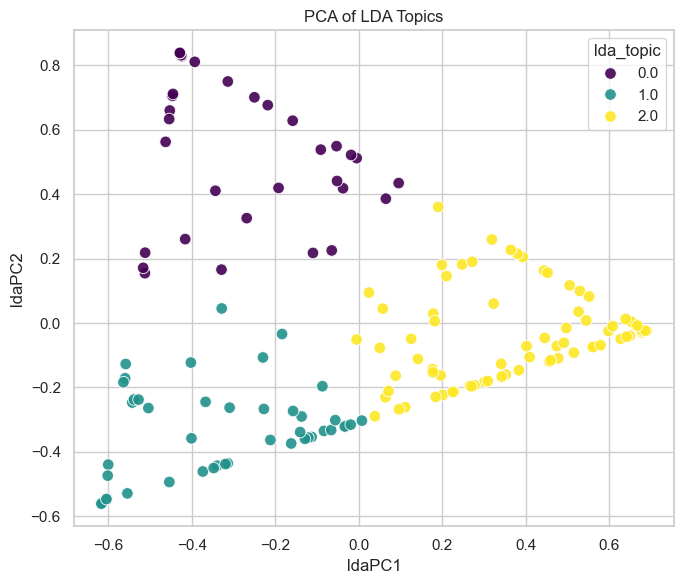

In [387]:

if 'ldaPC1' not in company_df.columns or 'ldaPC2' not in company_df.columns:
    print("Running PCA on topic matrix...")
    pca = PCA(n_components=2, random_state=42)
    pc  = pca.fit_transform(topic_mat)
    company_df.loc[reviewed_docs_mask, "ldaPC1"] = pc[:,0]
    company_df.loc[reviewed_docs_mask, "ldaPC2"] = pc[:,1]


plot_df = company_df.dropna(subset=['ldaPC1', 'ldaPC2', 'lda_topic'])
plt.figure(figsize=(7,6))
sns.scatterplot(data=plot_df, x="ldaPC1", y="ldaPC2",
                hue="lda_topic",
                palette="viridis", 
                s=70, alpha=0.9)

plt.title("PCA of LDA Topics") # Updated title
plt.tight_layout()
plt.savefig("outputs/lda_topics_pca.png", dpi=300)
plt.show()


## 5-9  Top Terms per Cluster

In [388]:
cluster_terms = {}

# It's assumed 'company_df', 'reviewed_docs_mask', 'best_labels', 'X_cnt', and 'feat' are available from previous cells.
labels_for_x_cnt = company_df.loc[reviewed_docs_mask, 'cluster_best'].values
unique_clusters = sorted(np.unique(best_labels))

for cluster_id in unique_clusters:
    mask = (labels_for_x_cnt == cluster_id)
    if np.any(mask):
        cluster_term_counts = X_cnt[mask].sum(axis=0)
        top_indices = np.asarray(cluster_term_counts).flatten().argsort()[-10:][::-1]
        top_terms = [feat[i] for i in top_indices]
        
        # Save the terms to the dictionary
        cluster_terms[f"cluster_{int(cluster_id)}"] = top_terms
        
        print(f"Cluster {int(cluster_id)}: {', '.join(top_terms)}")

Cluster 0: lương, dự_án, sếp, đồng_nghiệp, thoải_mái, đi, chế_độ, đội, rõ_ràng, tiền
Cluster 1: lương, thoải_mái, sếp, đồng_nghiệp, chế_độ, đi, đẹp, phát_triển, đội, trẻ
Cluster 2: lương, đội, đồng_nghiệp, overtime, đi, đẹp, environment, phát_triển, thoải_mái, văn_hóa


In [389]:
# 5-9.1 · Cluster Sentiment Summary Table

# ─ Merge each review’s sentiment back onto its company’s cluster label
reviews_with_cluster = (
    reviews_df[['id', 'sentiment']]             # reviews_df already has 'sentiment'
      .merge(
          company_df[['id', 'cluster_best']],  # company_df has the final cluster labels
          on='id',
          how='inner'
      )
)

# ─ 1) Count reviews by (cluster, sentiment)
sent_counts = (
    reviews_with_cluster
      .groupby(['cluster_best', 'sentiment'])
      .size()
      .unstack(fill_value=0)
)

# ─ 2) Convert to percentages
sent_pct = (
    sent_counts
      .div(sent_counts.sum(axis=1), axis=0)
      .mul(100)
      .round(1)
)

# ─ 3) Assemble the final DataFrame
rows = []
for cluster_key, terms in cluster_terms.items():
    cid = int(cluster_key.split('_')[1])
    pos = sent_pct.loc[cid].get('positive', 0)
    neg = sent_pct.loc[cid].get('negative', 0)
    neu = sent_pct.loc[cid].get('neutral',  0)
    rows.append({
        'Cụm': cid,
        'Chủ đề chính': ', '.join(terms[:5]),   # show top-5 terms
        'Tích cực': f"{pos}%",
        'Tiêu cực': f"{neg}%",
        'Trung tính': f"{neu}%"
    })

cluster_summary = (
    pd.DataFrame(rows)
      .sort_values('Cụm')
      .reset_index(drop=True)
)

# ─ 4) Display
display(cluster_summary)


,Cụm,Chủ đề chính,Tích cực,Tiêu cực,Trung tính
0,0,"lương, dự_án, sếp, đồng_nghiệp, thoải_mái",82.2%,7.2%,10.6%
1,1,"lương, thoải_mái, sếp, đồng_nghiệp, chế_độ",85.4%,4.4%,10.1%
2,2,"lương, đội, đồng_nghiệp, overtime, đi",91.1%,1.5%,7.4%


## 5-10 Word Clouds per Cluster

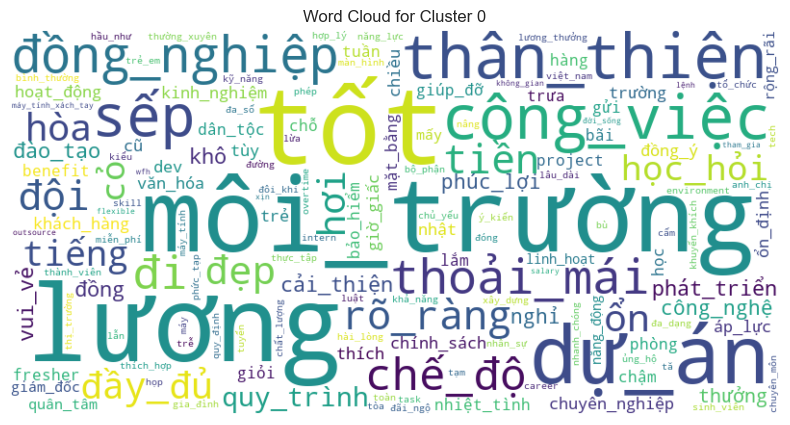

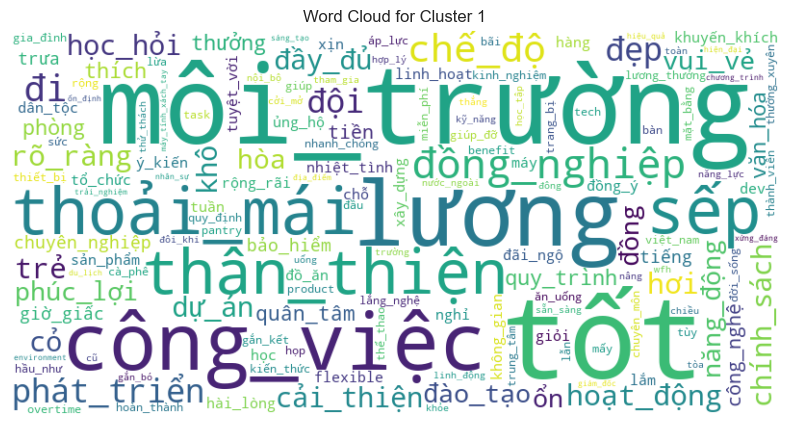

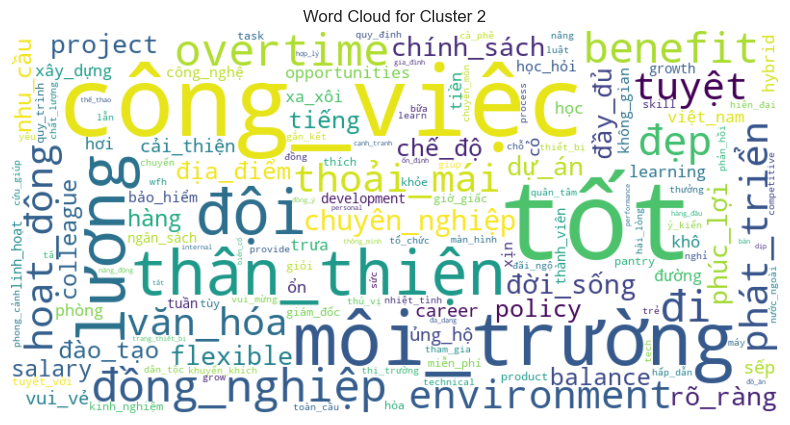

In [390]:
for cluster_id in unique_clusters:
    text_for_cloud = " ".join(
        company_df.loc[company_df['cluster_best'] == cluster_id, 'doc']
    )

    if text_for_cloud.strip():
        wc = WordCloud(
        width=800, height=400, background_color="white",
        max_words=150, collocations=False, stopwords=custom_stop_words).generate(text_for_cloud)

        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud for Cluster {int(cluster_id)}")
        plt.show()
    else:
        print(f"Cluster {int(cluster_id)} has no text to generate a word cloud.")


## 5-11 Save 

In [ ]:
company_df.to_csv("outputs/company_clusters_with_topics.csv", index=False)

with open("outputs/lda_topics.json", "w", encoding="utf-8") as f:
    json.dump(lda_topics, f, ensure_ascii=False, indent=2)

with open("outputs/cluster_terms.json", "w", encoding="utf-8") as f:
    json.dump(cluster_terms, f, ensure_ascii=False, indent=2)

print("\n💾 Saved: company_clusters_with_topics.csv · lda_topics.json · cluster_terms.json")


💾 Saved: company_clusters_with_topics.csv · lda_topics.json · cluster_terms.json


# 6 · Dashboard Implementation <a id="dashboard-implementation"></a>


## Please run "streamlit run streamlit_app.py" to use this app

In [373]:
dashboard_cols = [
    "id",
    "CompanyName",
    "review_cnt",
    "cluster_best"
]
final_export_cols = [col for col in dashboard_cols if col in company_df.columns]
company_df[final_export_cols].to_csv("outputs/company_clusters.csv", index=False)

print("\n✅ Dashboard bundle ready:")
print("   clean_reviews.csv · company_clusters_with_topics.csv")
print("   company_clusters.csv  ·  lda_topics.json  ·  cluster_terms.json")


✅ Dashboard bundle ready:
   clean_reviews.csv · company_clusters_with_topics.csv
   company_clusters.csv  ·  lda_topics.json  ·  cluster_terms.json
